In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud_check= pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

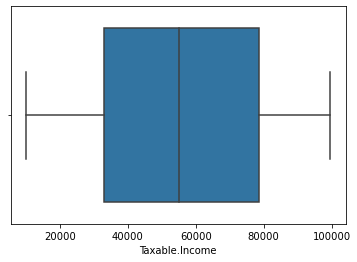

In [3]:
# boxplot for outlier detection
sns.boxplot(fraud_check['Taxable.Income'])

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

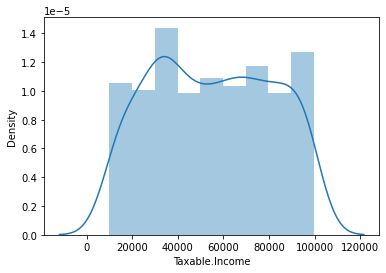

In [4]:
# density plot 
sns.distplot(fraud_check['Taxable.Income'])

In [5]:
fraud_check['Taxable.Income']= pd.cut(x = fraud_check['Taxable.Income'],bins = [0,30000,100000], labels=['risk','safe'])
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,safe,50047,10,YES
1,YES,Divorced,safe,134075,18,YES
2,NO,Married,safe,160205,30,YES
3,YES,Single,safe,193264,15,YES
4,NO,Married,safe,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,safe,39492,7,YES
596,YES,Divorced,safe,55369,2,YES
597,NO,Divorced,safe,154058,0,YES
598,YES,Married,safe,180083,17,NO


<AxesSubplot:>

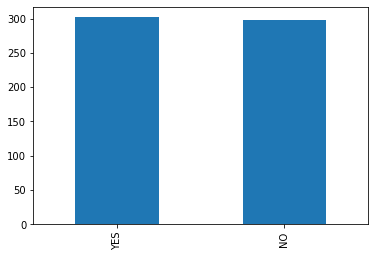

In [6]:
# barplotting
fraud_check['Urban'].value_counts().plot(kind = 'bar')

In [7]:
label_encoding = preprocessing.LabelEncoder()
fraud_check['Undergrad'] = label_encoding.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status'] = label_encoding.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban'] = label_encoding.fit_transform(fraud_check['Urban'])
fraud_check['Taxable.Income'] = label_encoding.fit_transform(fraud_check['Taxable.Income'])
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


#### fraud_check['Undergrad'] is label encoded as YES -> 1 , NO -> 0
 #### fraud_check['Marital.Status'] is label encoded as Divorced ->0 , Married -> 1 ,  Single -> 2
#### fraud_check['Urban'] is label encoded as YES -> 1 , NO -> 0
#### fraud_check['Taxable.Income'] is label encoded as  risk -> 0 safe -> 1
 

In [8]:
#correlation_matrix heatmap

<AxesSubplot:>

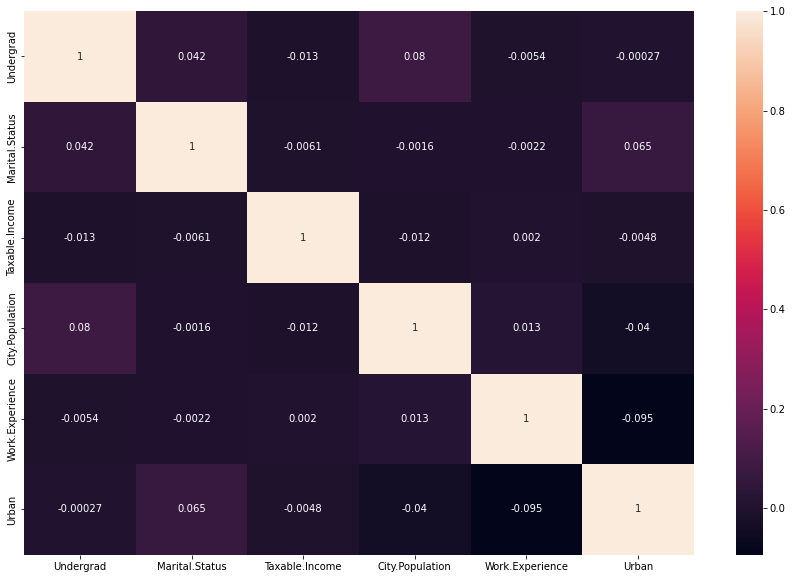

In [9]:
correlation_matrix = fraud_check.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True)

In [10]:
fraud_check = fraud_check[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban', 'Taxable.Income']]

In [11]:
# splitting variables
x = fraud_check.iloc[:,0:5]
y = fraud_check.iloc[:,5]

In [12]:
fraud_check['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

# Bagging

In [13]:
model = BaggingClassifier( base_estimator=DecisionTreeClassifier(),n_estimators= 40 , random_state= 40)

In [14]:
result_dt = np.mean(cross_val_score(model,x,y,cv=10))

In [15]:
result_dt

0.7266666666666666

# Random Forest

In [16]:
model_2 = RandomForestClassifier(n_estimators=40,max_features=3)

In [17]:
result_rf = np.mean(cross_val_score(model_2 ,x,y,cv=10))

In [18]:
result_rf

0.7383333333333333